# Size Analysis by Category
---

## Import

In [1]:
import cv2
import os
import seaborn as sns
import json
import multiprocessing as mp
from tqdm import tqdm
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid", {'axes.grid' : False})

## Config

In [2]:
CONFIG = {
    "path_data":"../../../dataset/",
    "info_data_train":"train.json",  # images, annotations
    "class":['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing'],
}

## Load Json

In [3]:
with open(os.path.join(CONFIG['path_data'], CONFIG['info_data_train'])) as js:
    json_train = json.load(js)

In [4]:
info_train = json_train['images']
annotations_train = json_train['annotations']
df = pd.DataFrame(info_train)
df['annotations'] = [[] for _ in info_train]
for an in annotations_train:
    df['annotations'].values[an['image_id']].append(an)


## Calc Detection Target Info

In [9]:
def get_image_info(data):
    img = cv2.imread(os.path.join(CONFIG['path_data'], data[2]))
    results = []
    for annotation in data[8]:
        bbox = annotation['bbox']
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0]+bbox[2]), int(bbox[1]+bbox[3]))
        img_sub = img[p1[1]:p2[1],p1[0]:p2[0]]
        annotation['w/h ratio'] = bbox[2] / bbox[3]
        annotation['width'] = bbox[2]
        annotation['height'] = bbox[3]
        annotation['width_norm'] = bbox[2] / max(bbox[2], bbox[3])
        annotation['height_norm'] = bbox[3] / max(bbox[2], bbox[3])
        results.append(annotation) 
    return results

pool = mp.Pool()
annotations_result = []
for ans in pool.map(get_image_info, tqdm(df.values)):
    for an in ans:
        annotations_result.append(an)


100%|██████████| 4883/4883 [00:09<00:00, 497.82it/s]


In [10]:
df_result = pd.DataFrame(annotations_result)
df_result['category'] = [CONFIG['class'][i] for i in df_result['category_id'].values]
df_result.head()

,image_id,category_id,area,bbox,iscrowd,id,w/h ratio,width,height,width_norm,height_norm,category
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0,1.166276,547.8,469.7,1.000000,0.857430,General trash
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1,0.318937,57.6,180.6,0.318937,1.000000,Metal
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2,0.796256,144.6,181.6,0.796256,1.000000,Plastic bag
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3,1.088924,274.3,251.9,1.000000,0.918338,Glass
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4,2.260155,233.7,103.4,1.000000,0.442448,Plastic


In [30]:
print(df_result.describe())

           image_id   category_id          area  iscrowd            id  \
count  23144.000000  23144.000000  2.314400e+04  23144.0  23144.000000   
mean    2439.377333      3.409307  9.286396e+04      0.0  11571.500000   
std     1410.659303      2.834300  1.359791e+05      0.0   6681.241651   
min        0.000000      0.000000  5.600000e-01      0.0      0.000000   
25%     1206.000000      1.000000  9.997670e+03      0.0   5785.750000   
50%     2453.500000      3.000000  3.893847e+04      0.0  11571.500000   
75%     3678.000000      7.000000  1.191225e+05      0.0  17357.250000   
max     4882.000000      9.000000  1.048371e+06      0.0  23143.000000   

          w/h ratio         width        height    width_norm   height_norm  
count  23144.000000  23144.000000  23144.000000  23144.000000  23144.000000  
mean       1.298707    257.499170    252.241518      0.835440      0.812647  
std        1.166790    204.582362    200.143898      0.228753      0.235351  
min        0.055391  

## Size Analysis by Category

### For width, height

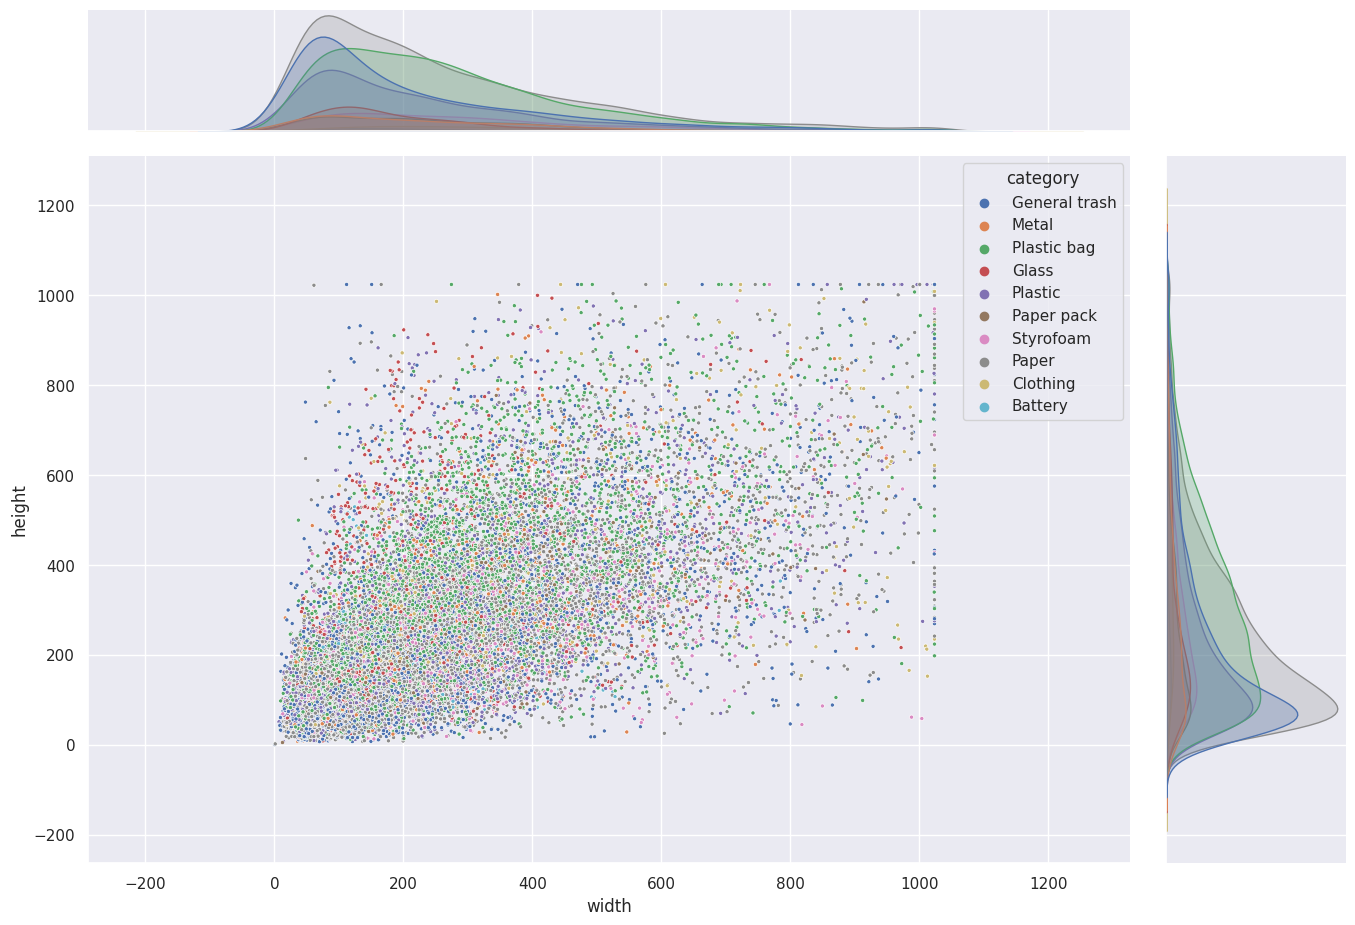

In [26]:
plot = sns.jointplot(data=df_result, kind='scatter', x='width', y='height', marker='.', hue='category')
plot.fig.set_figwidth(15)
plot.fig.set_figheight(10)

### For Green

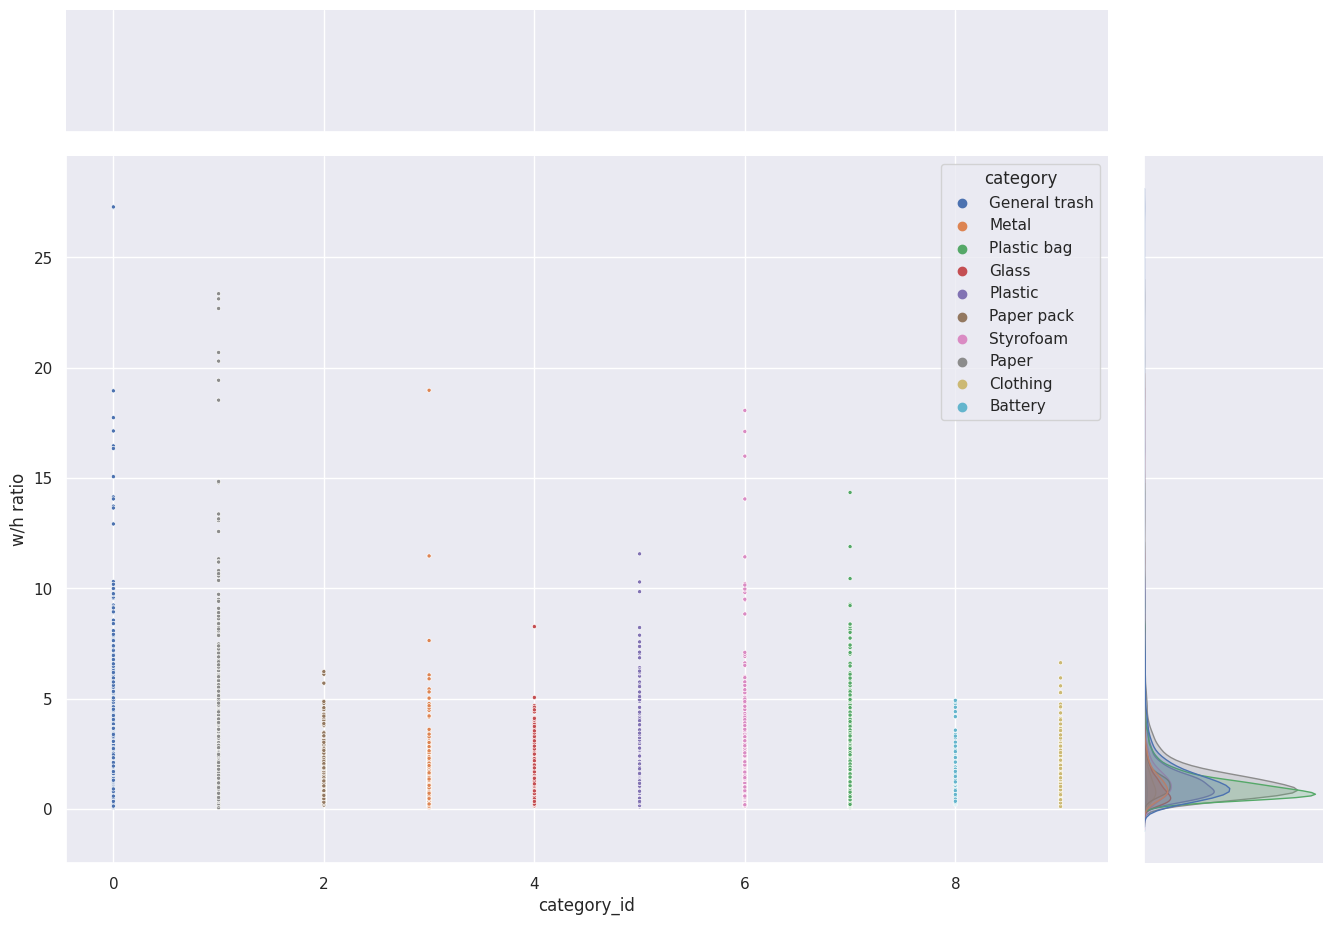

In [29]:
plot = sns.jointplot(data=df_result, kind='scatter', x='category_id', y='w/h ratio', marker='.', hue='category')
plot.fig.set_figwidth(15)
plot.fig.set_figheight(10)